## Introduction
<p>We will be covering various ML algorithms while working on the Iris dataset. This is a common dataset and is referred to as the "Hello world" of machine learning.</p>
<h2>Problem Definition.</h2>
<p>Problem definition is broken down to four steps.
<ol>
    <li>Problem Feature - The dataset contains information about 3 different types of iris flowers: Iris Versicolor, Iris Virginica and Iris Setosa.
</li>   
    <li>Aim - to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals </li>
    <li>Variables :
        <ul>
    <li>sepal_length: Sepal length, in centimeters, used as input.</li>
    <li>sepal_width: Sepal width, in centimeters, used as input.</li>
    <li>petal_length: Petal length, in centimeters, used as input.</li>
    <li>petal_width: Petal width, in centimeters, used as input.</li>
    <li>setosa: Iris setosa, true or false, used as target. </li>
    <li>versicolour: Iris versicolour, true or false, used as target.</li> 
    <li>virginica: Iris virginica, true or false, used as target.</li>
    </ul>
    </li>
     <li>Inputs- This is a clustering and classification problem. the dataset will be used as the input of all the algorithms</li>
<ol>
</p>

<h3>Imports</h3>
we will need various packages for our project

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import scipy
import numpy
import json
import sys

<h3>Exploratory Data Analysis(EDA)</h3>
<p>BY use of graphical and numerical techiques we will uncover :
<ul>
    <li>Which varibles suggest interesting relationships.</li>
    <li>Which observations are unusual.</li>
</ul>
</p>

<h4>Data Collection.</h4>
 <p>This is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.</p>
 <p>Iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.</p>

In [2]:
# load the dataset
dataset = pd.read_csv('Iris.csv')
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset.shape

(150, 6)

In [4]:
print("The shape of the dataset is ",dataset.shape)
dataset.head(5)

The shape of the dataset is  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h4>Visualization</h4>
<p>Data visualization is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.</p>


<h5>Scatter plots</h5>
<p>The purpose of a scatter plot to identify the type of relationship (if any) between two quantitative variables</p>

/home/muoki/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



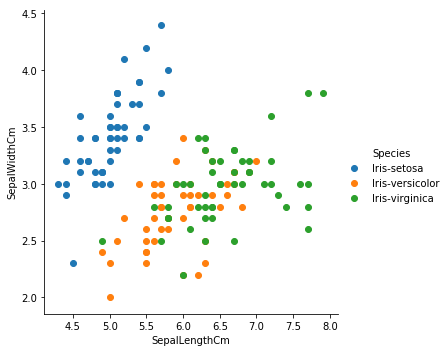

In [5]:
sns.FacetGrid(dataset, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

<h5>Box Plot</h5>
<p>boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.</p>

<Figure size 432x288 with 0 Axes>

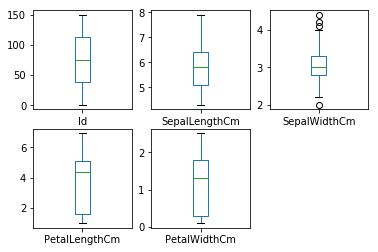

<Figure size 432x288 with 0 Axes>

In [6]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()

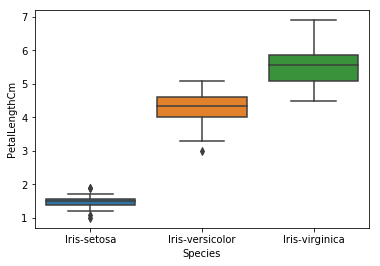

In [7]:
# To plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=dataset )
plt.show()

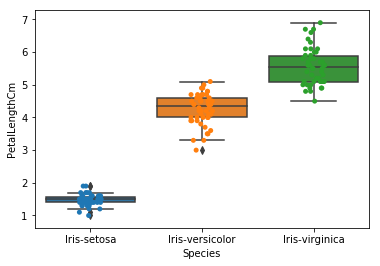

In [8]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")
plt.show()



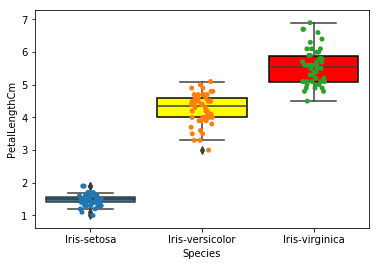

In [9]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()


<h4>Histogram</h4>
we can use a histogram of each input variable to get an idea of the distribution.

<Figure size 432x288 with 0 Axes>

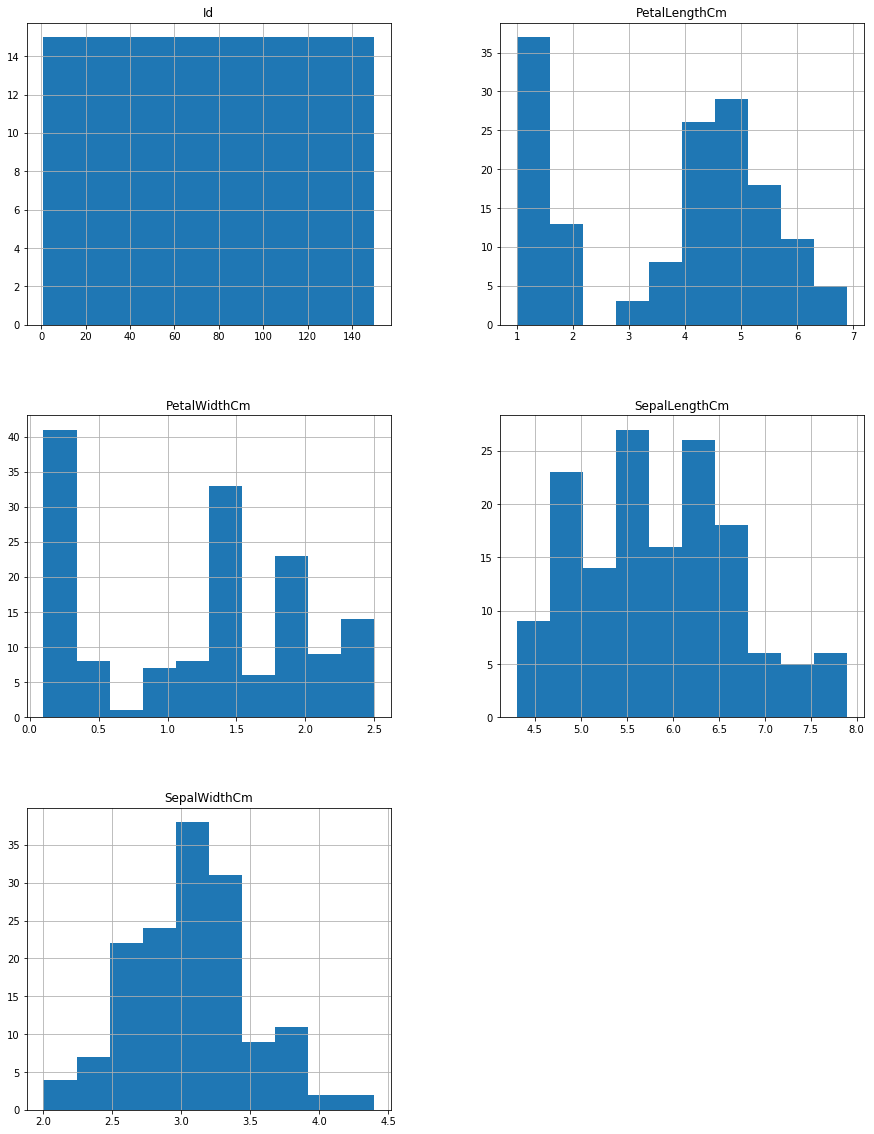

<Figure size 432x288 with 0 Axes>

In [10]:
# histograms
dataset.hist(figsize=(15,20))
plt.figure()

It seems two of the input variables have a Gaussian distribution. We can use algorithms that can exploit this assumption

<h4>Multivariate PLots</h4>


<Figure size 432x288 with 0 Axes>

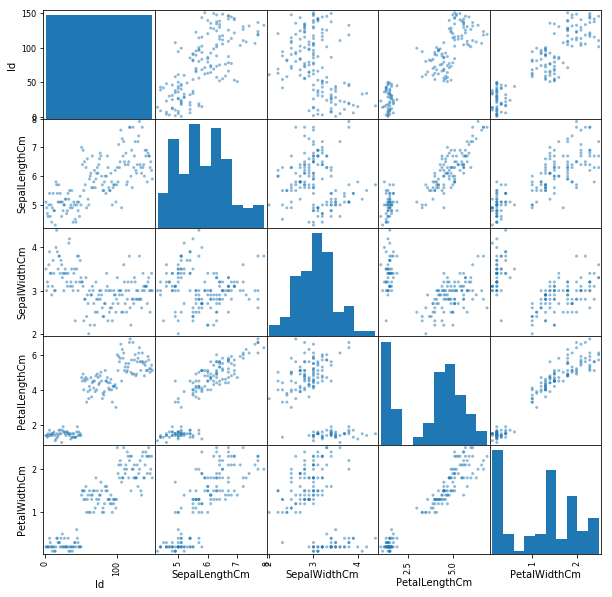

<Figure size 432x288 with 0 Axes>

In [11]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset,figsize=(10,10))
plt.figure()

<h4>Violinplots</h4>

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



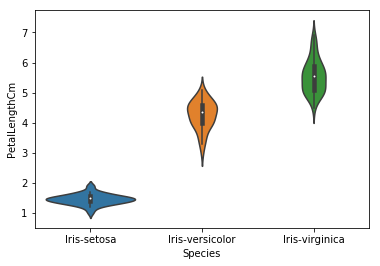

In [12]:
# violinplots on petal-length for each species

sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")

<h4>Pairplot</h4>

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



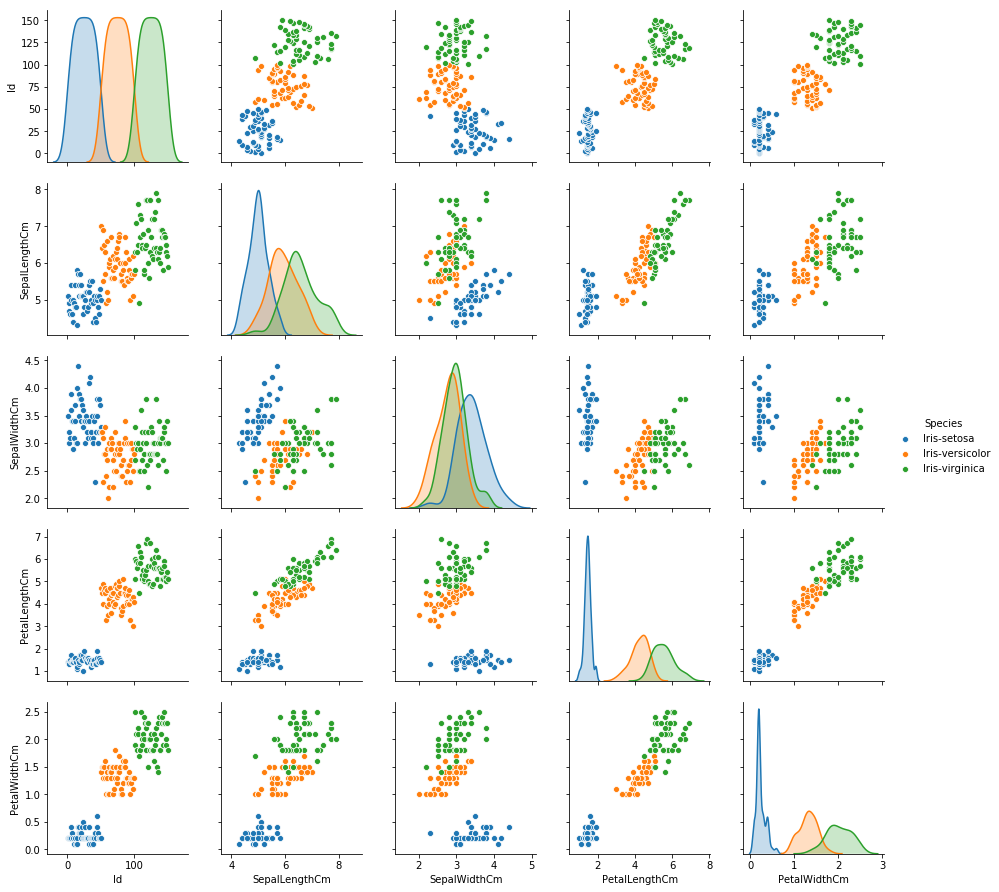

In [13]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")

Note that species setosa is separataed from the other two across all feature combinations

<h4>kdeplot</h4>

/home/muoki/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



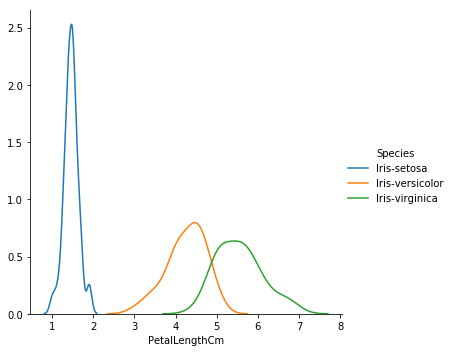

In [14]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(dataset, hue="Species", size=5).map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()

<h4>Joint plot</h4>

/home/muoki/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



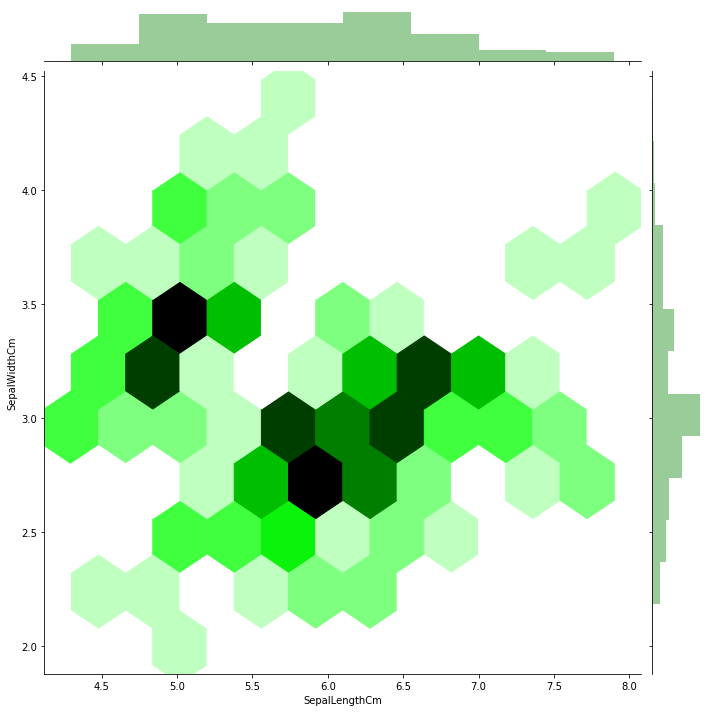

In [15]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=10,ratio=10, kind='hex',color='green')
plt.show()

<h4>andrew_curves</h4>

/home/muoki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.



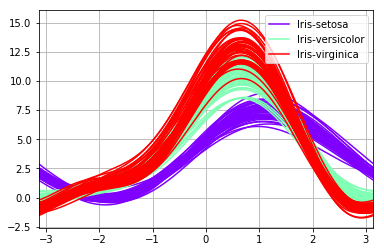

In [16]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

from pandas.tools.plotting import andrews_curves
andrews_curves(dataset.drop("Id", axis=1), "Species",colormap='rainbow')
plt.show()

/home/muoki/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



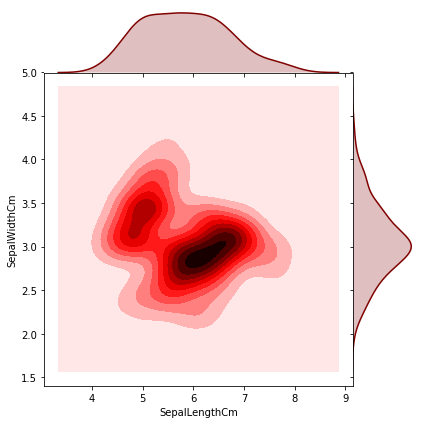

In [17]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=6, kind='kde', color='#800000', space=0)

<h4>Heat Map</h4>

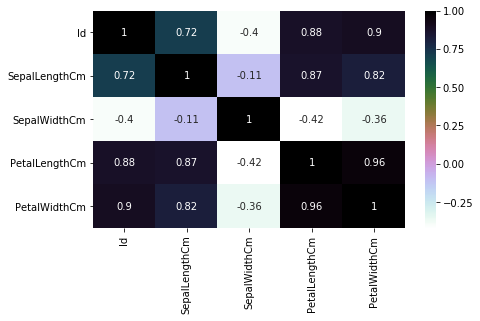

In [18]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

<h4>Radviz</h4>

/home/muoki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.



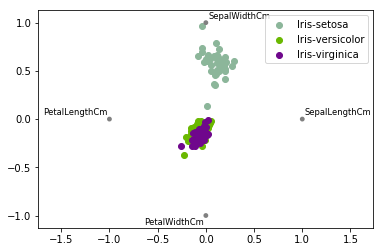

In [19]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(dataset.drop("Id", axis=1), "Species")

<h4>Bar plot</h4>

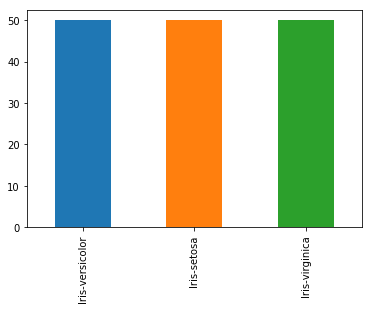

In [20]:
dataset['Species'].value_counts().plot(kind="bar")

<h4>Visialization with Plotly</h4>

In [21]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Sepal length',
                            showgrid=False),
                   yaxis=dict(title='Sepal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)

In [22]:
py.iplot(fig)

<h4>Data Preprocessing</h4>
<p>This refers to the transformations applied to our data before frrding it to the algorithms.</p>
<p>There are various steps involved they include:
<ul>
    <li>removing Target column (id)</li>
    <li>Sampling (without replacement)</li>
    <li>Making part of iris unbalanced and balancing (with undersampling and SMOTE)</li>
    <li>Introducing missing values and treating them (replacing by average values)</li>
    <li>Noise filtering</li>
    <li>Data discretization</li>
    <li>Normalization and standardization</li>
    <li>PCA analysis</li>
    <li>Feature selection (filter, embedded, wrapper)</li>
</ul>
</p>

<h4>Explore Dataset</h4>
<p>This includes:</p>
<ol>
<li> Dimensions of the dataset.</li>

<li> Peek at the data itself.</li>

<li> Statistical summary of all attributes.</li>

<li> Breakdown of the data by the class variable.</li>
</ol>

In [23]:
# shape
dataset.shape

(150, 6)

In [24]:
#columns*rows
dataset.size

900

In [25]:
# check for null entries
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
# remove rows that have NA's
dataset = dataset.dropna()

In [27]:
# getting info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [28]:
# you see number of unique item for Species 
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
dataset["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [30]:
dataset.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
dataset.tail() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
dataset.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor


In [33]:
# a statistical summary about the dataset

dataset.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
dataset.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [35]:
# to print dataset columns

dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<h4>Data cleaning</h4>
<p>Real world data is dirty.
The primary goal of data cleaning is to detect and remove errors and anomalies to increase the value of data in analytics and decision making. </p>


In [36]:
cols = dataset.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')
PetalWidthCm


In [37]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data

data_norm = pd.DataFrame(dataset)

for feature in features:
    dataset[feature] = (dataset[feature] - dataset[feature].mean())/dataset[feature].std()

#Show that should now have zero mean
print("Averages")
print(dataset.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(dataset.std(),2))

Averages
Id               9.473903e-17
SepalLengthCm   -5.684342e-16
SepalWidthCm    -6.158037e-16
PetalLengthCm    1.894781e-16
PetalWidthCm     1.198667e+00
dtype: float64

 Deviations
Id               1.000000
SepalLengthCm    1.000000
SepalWidthCm     1.000000
PetalLengthCm    1.000000
PetalWidthCm     0.582414
dtype: float64


In [38]:
#Shuffle The data
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)

In [39]:
# One Hot Encode as a dataframe
from sklearn.model_selection import train_test_split
y = get_dummies(dataset)

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(105, 2) (105, 8)
(45, 2) (45, 8)


<h3>Model Deployment</h3>

<h4>Families of ML algorithms</h4>
<p>There are various categories for ml algorithms:
<ul>
    <li>LInear
        <ul>
            <li>Linear Regression</li>
            <li>Logistic Regression</li>
            <li>Support Vector Machines</li>
        </ul>
    </li>
    <li>Tree-Based
        <ul>
            <li>Decision Tree</li>
            <li>Random Forest</li>
            <li>GBDT</li>
        </ul>
    </li>
    <li>KNN</li>
    <li>Neural Networks</li>
</ul>
</p>
<p>Categorize ML algo with the type of learning 

<ul>

   <li> Classification
    <ul>
      <li>  k-Nearest Neighbors</li>
       <li> LinearRegression</li>
       <li> SVM</li>
       <li> DT</li>
       <li> NN</li>
    </ul>    
    <li>clustering
        <ul>
       <li> K-means</li>
       <li> HCA</li>
       <li> Expectation Maximization</li>
</ul>
   <li> Visualization and dimensionality reduction:
      <ul>
      <li> Principal Component Analysis(PCA)</li>
       <li> Kernel PCA</li>
       <li> Locally -Linear Embedding (LLE)</li>
      <li>  t-distributed Stochastic Neighbor Embedding (t-SNE)</li>
          </ul>

   <li> Association rule learning
    <ul>
      <li>  Apriori</li>
      <li>  Eclat</li></ul>
   <li> Semisupervised learning</li>
    <li>Reinforcement Learning</li>
    <ul>
    <li>    Q-learning</li></ul>
   <li> Batch learning & Online learning</li>
   <li> Ensemble Learning</li>
</ul>
</p>


<h4>Prepare Features & Target</h4>

<p>First of all separating the data into dependent and independent variables</p>

In [40]:
X = dataset.iloc[:, :-1].values # independent fetures
y = dataset.iloc[:, -1].values # dependent 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h4>KNN</h4>

In [41]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<h4>Radius Neighbors Classifier</h4>

In [42]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.20      1.00      0.33         6

      micro avg       0.20      0.20      0.20        30
      macro avg       0.07      0.33      0.11        30
   weighted avg       0.04      0.20      0.07        30

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
accuracy is  0.2


/home/muoki/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/muoki/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/muoki/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



<h4>Logistic Regression</h4>
<p>
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis.
</p><p>
In statistics, the logistic model is a widely used statistical model that, in its basic form, uses a logistic function to model a binary dependent variable; many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; it is a form of binomial regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1"
</p>

In [43]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
accuracy is 0.9333333333333333


/home/muoki/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/muoki/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



<h4>Passive Aggressive Classifier</h4>

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
accuracy is 0.9333333333333333


/home/muoki/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



 <h4>Naive Bayes</h4>
<p>
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.</p>

In [45]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<h4>BernoulliNB</h4>
<p>
Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.</p>

In [46]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.69      0.75        13
 Iris-virginica       0.50      0.67      0.57         6

      micro avg       0.80      0.80      0.80        30
      macro avg       0.77      0.79      0.77        30
   weighted avg       0.82      0.80      0.81        30

[[11  0  0]
 [ 0  9  4]
 [ 0  2  4]]
accuracy is 0.8


 <h4>SVM</h4>
<p>
The advantages of support vector machines are:
<ul>
    <li> Effective in high dimensional spaces.</li>
   <li> Still effective in cases where number of dimensions is greater than the number of samples.</li>
   <li> Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.</li>
   <li> Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.</li>
    </ul>
</p>
<p>
The disadvantages of support vector machines include:
<ul>
    <li>If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.</li>
    <li>SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation</li>
</ul>
</p>

In [47]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


/home/muoki/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



<h4> Nu-Support Vector Classification</h4>

In [48]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


/home/muoki/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



<li>Linear Support Vector Classification</li>
<p>
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.</p>

In [49]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<h4>Decision Tree</h4>
<p>
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.</p>

In [50]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


 <h4>ExtraTreeClassifier</h4>
<p>
An extremely randomized tree classifier.

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.
</p>
Warning: Extra-trees should only be used within ensemble methods.

In [51]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy is 0.9666666666666667


<h4>Neural network</h4>
<p>
I have used multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.</p>

In [52]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

weights $w$, bias $b$, and input $x$ are defined as:

In [53]:
w = np.array([0.2, 0.3, 0.8])
b = 0.5
x = np.array([0.5, 0.6, 0.1])

Our neural unit would compute $z$ as the dot-product $w \cdot x$ and add the bias $b$ to it. The sigmoid function defined above will convert this $z$ value to the activation value $a$ of the unit:

In [54]:
z = w.dot(x) + b
print("z:", z)
print("a:", sigmoid(z))

z: 0.8600000000000001
a: 0.7026606543447316



<h4>The XOR Problem</h4>

The power of neural units comes from combining them into larger networks. Minsky and Papert (1969): A single neural unit cannot compute the simple logical function XOR.

The task is to implement a simple perceptron to compute logical operations like AND, OR, and XOR.

    Input: $x_1$ and $x_2$
    Bias: $b = -1$ for AND; $b = 0$ for OR
    Weights: $w = [1, 1]$

with the following activation function:

$$ y = \begin{cases} \ 0 & \quad \text{if } w \cdot x + b \leq 0\\ \ 1 & \quad \text{if } w \cdot x + b > 0 \end{cases} $$

We can define this activation function in Python as:


In [55]:
def activation(z):
    if z > 0:
        return 1
    return 0

For AND we could implement a perceptron as:

In [56]:
w = np.array([1, 1])
b = -1
x = np.array([0, 0])
print("0 AND 0:", activation(w.dot(x) + b))
x = np.array([1, 0])
print("1 AND 0:", activation(w.dot(x) + b))
x = np.array([0, 1])
print("0 AND 1:", activation(w.dot(x) + b))
x = np.array([1, 1])
print("1 AND 1:", activation(w.dot(x) + b))

0 AND 0: 0
1 AND 0: 0
0 AND 1: 0
1 AND 1: 1


For OR we could implement a perceptron as:

In [57]:
w = np.array([1, 1])
b = 0
x = np.array([0, 0])
print("0 OR 0:", activation(w.dot(x) + b))
x = np.array([1, 0])
print("1 OR 0:", activation(w.dot(x) + b))
x = np.array([0, 1])
print("0 OR 1:", activation(w.dot(x) + b))
x = np.array([1, 1])
print("1 OR 1:", activation(w.dot(x) + b))

0 OR 0: 0
1 OR 0: 1
0 OR 1: 1
1 OR 1: 1


In [58]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


/home/muoki/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



<h4>RandomForest</h4>

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [59]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


/home/muoki/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



<h4>Bagging classifier</h4>

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting . If samples are drawn with replacement, then the method is known as Bagging . When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces . Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches .[http://scikit-learn.org]

In [60]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<h4>AdaBoost classifier</h4>

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. This class implements the algorithm known as AdaBoost-SAMME .

In [61]:


from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


<h4>Gradient Boosting Classifier</h4>

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


<h4>Linear Discriminant Analysis</h4>

Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<h4>Quadratic Discriminant Analysis</h4>
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class.


In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<h4>Kmeans</h4>

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

Text(0.5,1,'Selecting k with the Elbow Method')

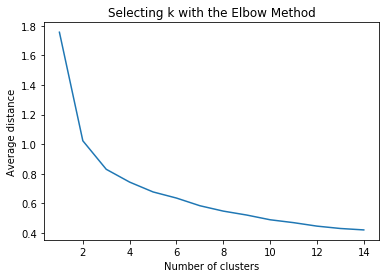

In [65]:
from sklearn.cluster import KMeans
iris_SP = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear


Backpropagation

Backpropagation is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network.It is commonly used to train deep neural networks,a term referring to neural networks with more than one hidden layer.

In this example we will use a very simple network to start with. The network will only have one input and one output layer. 

We will use Numpy to compute the network parameters, weights, activation, and outputs:

We will use the Sigmoid activation function:


In [66]:
def sigmoid(z):
    """The sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

In [67]:
def relu(z):
    """The ReLU activation function."""
    return max(0, z)


In [68]:
def sigmoid_prime(z):
    """The derivative of sigmoid for z."""
    return z * (1 - z)



In [69]:


X = np.array([ [ 0, 0, 1 ],
               [ 0, 1, 1 ],
               [ 1, 0, 1 ],
               [ 1, 1, 1 ] ])

In [70]:
y = np.array([[0,0,1,1]]).T
print(y)

[[0]
 [0]
 [1]
 [1]]


In [71]:
np.random.seed(1)



We create a weight matrix ($Wo$) with randomly initialized weights:


In [72]:
n_inputs = 3
n_outputs = 1
#Wo = 2 * np.random.random( (n_inputs, n_outputs) ) - 1
Wo = np.random.random( (n_inputs, n_outputs) ) * np.sqrt(2.0/n_inputs)
print(Wo)

[[3.40497041e-01]
 [5.88142486e-01]
 [9.33866473e-05]]




The reason for the output weight matrix ($Wo$) to have 3 rows and 1 column is that it represents the weights of the connections from the three input neurons to the single output neuron. The initialization of the weight matrix is random with a mean of $0$ and a variance of $1$. There is a good reason for chosing a mean of zero in the weight initialization. See for details the section on Weight Initialization in the Stanford course CS231n on Convolutional Neural Networks for Visual Recognition.

The core representation of this network is basically the weight matrix Wo. The rest, input matrix, output vector and so on are components that we need to learning and evaluation. The leraning result is stored in the Wo weight matrix.

We loop in the optimization and learning cycle 10,000 times. In the forward propagation line we process the entire input matrix for training. This is called full batch training. I do not use an alternative variable name to represent the input layer, instead I use the input matrix $X$ directly here. Think of this as the different inputs to the input neurons computed at once. In principle the input or training data could have many more training examples, the code would stay the same.


In [73]:
for n in range(10000):
    # forward propagation
    l1 = sigmoid(np.dot(X, Wo))
    
    # compute the loss
    l1_error = y - l1
    #print("l1_error:\n", l1_error)
    
    # multiply the loss by the slope of the sigmoid at l1
    l1_delta = l1_error * sigmoid_prime(l1)
    #print("l1_delta:\n", l1_delta)
    
    #print("error:", l1_error, "\nderivative:", sigmoid(l1, True), "\ndelta:", l1_delta, "\n", "-"*10, "\n")
    # update weights
    Wo += np.dot(X.T, l1_delta)

print("l1:\n", l1)

l1:
 [[0.00966614]
 [0.00786443]
 [0.99358981]
 [0.99211861]]




The dots in $l1$ represent the lines in the graphic below. The lines represent the slope of the sigmoid in the particular position. The slope is highest with a value $x = 0$ (blue dot). It is rather shallow with $x = 2$ (green dot), and not so shallow and not as high with $x = -1$. All derivatives are between $0$ and $1$, of course, that is, no slope or a maximal slope of $1$. There is no negative slope in a sigmoid function.

The matrix $l1\_error$ is a 4 by 1 matrix (4 rows, 1 column). The derivative matrix $sigmoid\_prime(l1)$ is also a 4 by one matrix. The returned matrix of the element-wise product $l1\_delta$ is also the 4 by 1 matrix.

The product of the error and the slopes reduces the error of high confidence predictions. When the sigmoid slope is very shallow, the network had a very high or a very low value, that is, it was rather confident. If the network guessed something close to $x=0, y=0.5$, it was not very confident. Such predictions without confidence are updated most significantly. The other peripheral scores are multiplied with a number closer to $0$.

In the prediction line $l1 = sigmoid(np.dot(X, Wo))$ we compute the dot-product of the input vectors with the weights and compute the sigmoid on the sums. The result of the dot-product is the number of rows of the first matrix ($X$) and the number of columns of the second matrix ($Wo$). In the computation of the difference between the true (or gold) values in $y$ and the "guessed" values in $l1$ we have an estimate of the miss.

An example computation for the input $[ 1, 0, 1 ]$ and the weights $[ 9.5, 0.2, -0.1 ]$ and an output of $0.99$: If $y = 1$, the $l1\_error = y - l2 = 0.01$, and $l1\_delta = 0.01 * tiny\_deriv$:


<h4>More Complex Example with Backpropagation</h4>

The pattern here is our XOR pattern or problem: If there is a $1$ in either column $1$ or $2$, but not in both, the output is $1$ (XOR over column $1$ and $2$).

From our discussion of the XOR problem we remember that this is a non-linear pattern, a one-to-one relationship between a combination of inputs.

To cope with this problem, we need a network with another layer, that is a layer that will combine and transform the input, and an additional layer will map it to the output. We will add a hidden layer with randomized weights and then train those to optimize the output probabilities of the table above.

We will define a new $X$ input matrix that reflects the above table:


In [76]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [77]:
#we also define output matrix
y = np.array([[ 0, 1, 1, 0]]).T
print(y)



[[0]
 [1]
 [1]
 [0]]


In [78]:
np.random.seed(1)



Assume that our 3 inputs are mapped to 4 hidden layer ($Wh$) neurons, we have to initialize the hidden layer weights in a 3 by 4 matrix. The outout layer ($Wo$) is a single neuron that is connected to the hidden layer, thus the output layer is a 4 by 1 matrix:


In [79]:
n_inputs = 3
n_hidden_neurons = 4
n_output_neurons = 1
Wh = np.random.random( (n_inputs, n_hidden_neurons) )  * np.sqrt(2.0/n_inputs)
Wo = np.random.random( (n_hidden_neurons, n_output_neurons) )  * np.sqrt(2.0/n_hidden_neurons)
print("Wh:\n", Wh)
print("Wo:\n", Wo)

Wh:
 [[3.40497041e-01 5.88142486e-01 9.33866473e-05 2.46853512e-01]
 [1.19825683e-01 7.53941469e-02 1.52080826e-01 2.82149152e-01]
 [3.23959286e-01 4.39942021e-01 3.42270888e-01 5.59479379e-01]]
Wo:
 [[0.14456957]
 [0.62092279]
 [0.01936595]
 [0.47409212]]


In [80]:
for i in range(100000):
    l1 = sigmoid(np.dot(X, Wh))
    l2 = sigmoid(np.dot(l1, Wo))
    
    l2_error = y - l2
    
    if (i % 10000) == 0:
        print("Error:", np.mean(np.abs(l2_error)))
    
    # gradient, changing towards the target value
    l2_delta = l2_error * sigmoid_prime(l2)
    
    # compute the l1 contribution by value to the l2 error, given the output weights
    l1_error = l2_delta.dot(Wo.T)
    
    # direction of the l1 target:
    # in what direction is the target l1?
    l1_delta = l1_error * sigmoid_prime(l1)
    
    Wo += np.dot(l1.T, l2_delta)
    Wh += np.dot(X.T, l1_delta)

print("Wo:\n", Wo)
print("Wh:\n", Wh)

Error: 0.49962354308293877
Error: 0.0101850686863701
Error: 0.006740755437297382
Error: 0.005345052957883487
Error: 0.004547502999833719
Error: 0.0040174501050729405
Error: 0.003633449514087014
Error: 0.003339229754058862
Error: 0.003104745370932277
Error: 0.002912327550144693
Wo:
 [[-7.07355497]
 [14.20975817]
 [-7.01708617]
 [-7.15528258]]
Wh:
 [[ 6.66182717  6.80494448 -3.00320286  3.65642155]
 [-3.43419418  6.77518798  6.58168773  3.71366194]
 [ 0.59089835 -1.96151177  0.18071609 -5.62078292]]


The new computation in this new loop is $l1\_error = l2\_delta.dot(Wo.T)$, a confidence weighted error from $l2$ to compute an error for $l1$. The computation sends the error across the weights from $l2$ to $l1$. The result is a contribution weighted error, because we learn how much each node value in $l1$ contributed to the error in $l2$. This step is called backpropagation. We update $Wh$ using the same steps we did in the 2 layer implementation.

In [74]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

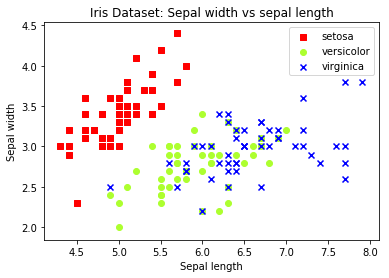

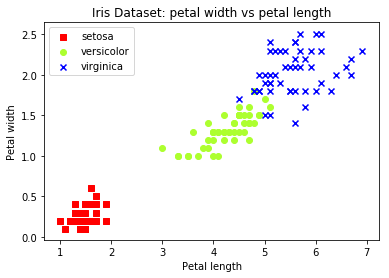

In [75]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i]
    py = X_iris[:, 1][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()